# 公式

# 生成输入数据

In [2]:
%matplotlib inline

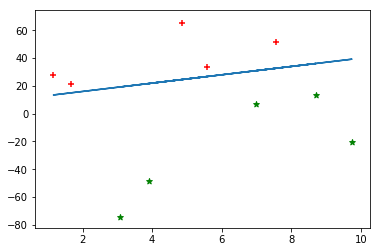

X12= [[  3.07692696   8.71026354   6.99625905   9.74634244   3.90766438
    5.58253379   4.84832834   1.16051513   1.66904953   7.56041608]
 [-74.74419628  13.23542285   6.91375584 -20.54781009 -48.47605524
   33.25449461  65.53604994  27.75646367  21.03477983  51.73137282]] 
Y= [[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]


In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generateOriginData(samNum):
    X1 = np.random.random((samNum, 1)) * 10
    Y = np.zeros((samNum, 1))
    Y[(samNum // 2):] = 1
    # print(Y)
    # print(X1)
    X2 = 3 * X1 + 10
    # print(X2)
    plt.plot(X1, X2)
    offset = np.random.uniform(1, 100, size=(samNum, 1))
    X2[0:samNum // 2] -= offset[0:samNum // 2]
    X2[samNum // 2:] += offset[samNum // 2:]
    plt.scatter(X1[:samNum // 2], X2[:samNum // 2], marker='*', color='g')
    plt.scatter(X1[samNum // 2:], X2[samNum // 2:], marker='+', color='r')
    X12 = np.append(X1, X2, axis=1)
    plt.show()
    print('X12=', X12.T, '\nY=', Y.T)
    return (X12,Y)

samNum = 10
X12,Y = generateOriginData(samNum)

# 求解

A= [[1.21199867e-06 1.68088329e-01 1.29840860e-01 5.06849696e-04
  6.32352330e-05 9.53720430e-01 9.99822699e-01 9.82324469e-01
  9.36842880e-01 9.94570119e-01]]
W= [[-0.430326  ]
 [ 0.16463865]]  B= [[-0.04003894]] W1/W2= [0.38259053]
J= 0.04597595978516718 Jprev= 0.046394326009852535 J-Jprev= -0.000418366224685357 cunt= 100


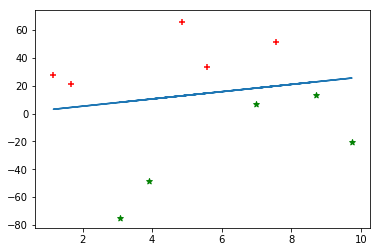

In [24]:
def plotLine(X1, X2, W, B):
    X1 = np.array(X1).reshape(len(X1), 1)
    X2 = np.array(X2).reshape(len(X2), 1)
    plt.plot(X1, -(W[0] / W[1] * X1) - B)
    plt.scatter(X1[:samNum // 2], X2[:samNum // 2], marker='*', color='g')
    plt.scatter(X1[samNum // 2:], X2[samNum // 2:], marker='+', color='r')
    plt.show()

W = np.zeros((2, 1))  # 只有2个特征
B = np.zeros((1, 1))

X12 = X12.T  # 变成两行,每一列都是一个样点
#X12 = np.array([[3.41827387,2.84210487,   5.46492579,   1.37031555],[-28.43534583, -21.74959217,  31.71029071,  45.06466409]])
effect = np.array([[0.01],])
Jprev = 1;
Jcuren = 0xFFFFFFFF
cnt = 0;
while (Jcuren - Jprev < -10e-5 or cnt < 15) and cnt < 100:  #避免前几次迭代不稳定，导致J下降不明显
    cnt+=1
    Z = np.dot(W.T, X12) + B
    Z = Z.T
    # print('z=',Z.T)
    A = 1 / (1 + np.exp(-Z))
    #print('A=',A.T)
    L = [Y * np.log(A) + (1 - Y) * np.log(1 - A)] * np.array([-1])
    #     # print('L*-1=',L*(np.array([-1])))
    #print('L=',L.T)
    Jprev = Jcuren;
    Jcuren = np.sum(L) / samNum
    #print('J=', Jcuren, 'Jprev=', Jprev, 'J-Jprev=',Jcuren-Jprev,  'cunt=',cnt)

    dA = -Y / A + (1 - Y) / (1 - A)
    dZ = dA * (A * (1 - A))
    dW = dZ * (X12.T)
    dB = dZ

    dWAve = np.sum(dW, axis=0) / samNum
    dBAve = np.sum(dB, axis=0) / samNum
    dWAve = np.array(dWAve).reshape(len(dWAve), 1)
    dBAve = np.array(dBAve).reshape(len(dBAve), 1)
    # print('dWAve=',dWAve)
    # print('dBAve=',dBAve)
    W = W - effect * dWAve
    B = B - effect * dBAve
    
print('A=',A.T)
print('W=', W, ' B=', B, 'W1/W2=', -W[1] / W[0])
print('J=', Jcuren, 'Jprev=', Jprev, 'J-Jprev=',Jcuren-Jprev,  'cunt=',cnt)
plotLine(X12[0], X12[1], W, B)

# 结果